In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [19]:
def intToBitArray(img) :
    list = []

    for i in range(row):
        for j in range(col):
             list.append (np.binary_repr( img[i][j] ,width=8  ) )

    return list

In [26]:
def bitplane(bitArray , img1D ):
    List_of_bits = [  int(   i[bitArray]  )    for i in img1D]
    return List_of_bits

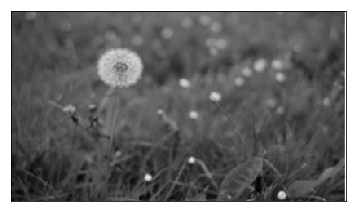

In [11]:
img = cv2.imread("Q4.png",0)
plt.imshow(img, cmap = "gray")
plt.xticks([]),plt.yticks([])
plt.show()

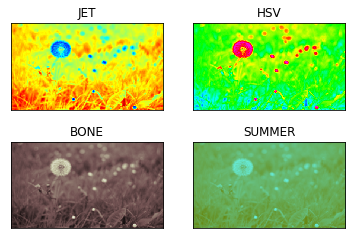

In [36]:
im_color_jet = cv2.applyColorMap(img, cv2.COLORMAP_JET)
im_color_hsv = cv2.applyColorMap(img, cv2.COLORMAP_HSV)
im_color_bone = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
im_color_summer = cv2.applyColorMap(img, cv2.COLORMAP_SUMMER)

plt.subplot(2,2,1), plt.imshow(im_color_jet), plt.title("JET"), plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2), plt.imshow(im_color_hsv), plt.title("HSV"), plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3), plt.imshow(im_color_bone), plt.title("BONE"), plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4), plt.imshow(im_color_summer), plt.title("SUMMER"), plt.xticks([]),plt.yticks([])


plt.show()

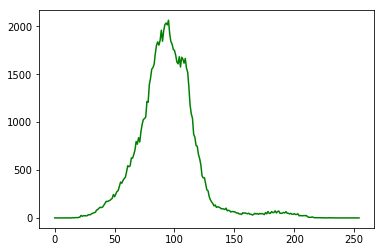

In [12]:
hist = cv2.calcHist([img],[0],None,[255],[0,255])
plt.plot(hist,color = 'g')
plt.show()

(234, 411, 3)


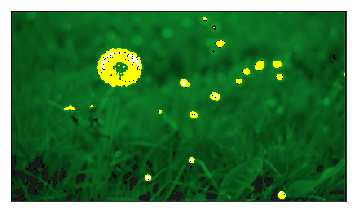

In [37]:
row,col = img.shape

img_color_1 = np.zeros((row,col,3),dtype = 'uint8')
print(img_color_1.shape)
min_range1 = 0
max_range1 = 50
min_range2 = 51
max_range2 = 150
min_range3 = 151
max_range3 = 200
min_range4 = 201
max_range4 = 255
for i in range(row):
    for j in range(col):
        if img[i,j] > min_range1 and img[i,j] < max_range1:
            img_color_1[i,j,0] = 25
            img_color_1[i,j,1] = 25
            img_color_1[i,j,2] = 25
        if img[i,j] > min_range2 and img[i,j] < max_range2:
            img_color_1[i,j,0] = 0.3*img[i,j]
            img_color_1[i,j,1] = img[i,j]
            img_color_1[i,j,2] = 0.1*img[i,j]
        if img[i,j] > min_range3 and img[i,j] < max_range3:
            img_color_1[i,j,0] = 0
            img_color_1[i,j,1] = 255
            img_color_1[i,j,2] = 255
        if img[i,j] > min_range4 and img[i,j] < max_range4:
            img_color_1[i,j,0] = 255
            img_color_1[i,j,1] = 255
            img_color_1[i,j,2] = 255
img_color_1 = cv2 . cvtColor(img_color_1,cv2 . COLOR_BGR2RGB)
plt.imshow(img_color_1)
plt.xticks([]),plt.yticks([])
plt.show()

In [18]:
secret_msg = cv2.imread("name.png",cv2.IMREAD_GRAYSCALE)
rows, cols = np.shape(img)
dim = (cols,rows)
secret_msg = cv2.resize(secret_msg, dim, interpolation = cv2.INTER_AREA)
r= img_color_1[:, :, 0]
g= img_color_1[:, :, 1]
b= img_color_1[:, :, 2]
print(secret_msg.shape)

(234, 411)


In [23]:
img2D_r = np.reshape(intToBitArray(r), (rows,cols))
img2D_g = np.reshape(intToBitArray(g), (rows,cols))
img2D_b = np.reshape(intToBitArray(b), (rows,cols))
img2D = np.reshape(intToBitArray(secret_msg), (rows,cols))
img2D.shape

(234, 411)

In [29]:
#image represented by 8th bit plane
eight_bit_of_image_r = np.array( bitplane(0,  intToBitArray(r)) ) * 128
eight_bit_of_image_g = np.array( bitplane(0, intToBitArray(g) ) ) * 128
eight_bit_of_image_b = np.array( bitplane(0, intToBitArray(b) ) ) * 128
#image represented by 7th bit plane
seven_bit_of_image_r = np.array( bitplane(1,intToBitArray(r)) ) * 64
seven_bit_of_image_g = np.array( bitplane(1,intToBitArray(g)) ) * 64
seven_bit_of_image_b = np.array( bitplane(1,intToBitArray(b)) ) * 64
#image represented by 6th bit plane
six_bit_of_image_r = np.array( bitplane(2,intToBitArray(r)) ) * 32
six_bit_of_image_g = np.array( bitplane(2,intToBitArray(g)) ) * 32
six_bit_of_image_b = np.array( bitplane(2,intToBitArray(b)) ) * 32
#image represented by 5th bit plane
five_bit_of_image_r = np.array( bitplane(3,intToBitArray(r)) ) * 16
five_bit_of_image_g = np.array( bitplane(3,intToBitArray(g)) ) * 16
five_bit_of_image_b = np.array( bitplane(3,intToBitArray(b)) ) * 16
#image represented by 4th bit plane
four_bit_of_image_r = np.array( bitplane(4,intToBitArray(r)) ) * 8
four_bit_of_image_g = np.array( bitplane(4,intToBitArray(g)) ) * 8
four_bit_of_image_b = np.array( bitplane(4,intToBitArray(b)) ) * 8
#image represented by 3rd bit plane
three_bit_of_image_r = np.array( bitplane(5,intToBitArray(r)) ) * 4
three_bit_of_image_g = np.array( bitplane(5,intToBitArray(g)) ) * 4
three_bit_of_image_b = np.array( bitplane(5,intToBitArray(b)) ) * 4
#image represented by 2nd bit plane
two_bit_of_image_r = np.array( bitplane(6,intToBitArray(r)) ) * 2
two_bit_of_image_g = np.array( bitplane(6,intToBitArray(g)) ) * 2
two_bit_of_image_b = np.array( bitplane(6,intToBitArray(b)) ) * 2
#bitplane of 1st bit of img
one_bit_of_image_r = np.array( bitplane(7,intToBitArray(r)) ) * 1
one_bit_of_image_g = np.array( bitplane(7,intToBitArray(g)) ) * 1
one_bit_of_image_b = np.array( bitplane(7,intToBitArray(b)) ) * 1

In [31]:
one_bit_of_image1_gray = np.array( bitplane(0, intToBitArray(secret_msg)) ) * 1
one_bit_of_image1_gray= np.reshape(one_bit_of_image1_gray,(rows,cols))
one_bit_of_image1_gray = np.array( bitplane(0,  intToBitArray(secret_msg)) ) * 1

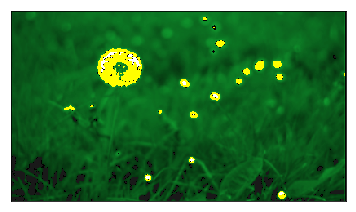

In [32]:
combine1_r_secret =  eight_bit_of_image_r + seven_bit_of_image_r + six_bit_of_image_r + five_bit_of_image_r + four_bit_of_image_r + three_bit_of_image_r + two_bit_of_image_r + one_bit_of_image1_gray
combine1_g_secret =  eight_bit_of_image_g + seven_bit_of_image_g + six_bit_of_image_g + five_bit_of_image_g + four_bit_of_image_g + three_bit_of_image_g + two_bit_of_image_g + one_bit_of_image1_gray
combine1_b_secret =  eight_bit_of_image_b + seven_bit_of_image_b + six_bit_of_image_b + five_bit_of_image_b + four_bit_of_image_b + three_bit_of_image_b + two_bit_of_image_b + one_bit_of_image1_gray
comb1_r_secret = np.reshape(combine1_r_secret,(rows,cols))
comb1_g_secret = np.reshape(combine1_g_secret,(rows,cols))
comb1_b_secret = np.reshape(combine1_b_secret,(rows,cols))
comb_secret = cv2.merge((comb1_r_secret,comb1_g_secret,comb1_b_secret))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.imshow(comb_secret)
plt.show()